<a href="https://colab.research.google.com/github/Lily-Kwok/hackgt/blob/main/colorblind.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2

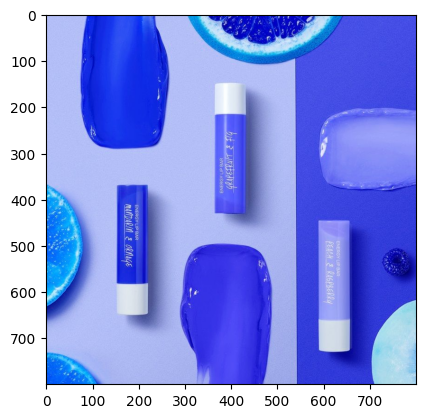

In [ ]:
#read in image using opencv
img=cv2.imread('colors.png')
plt.imshow(img)

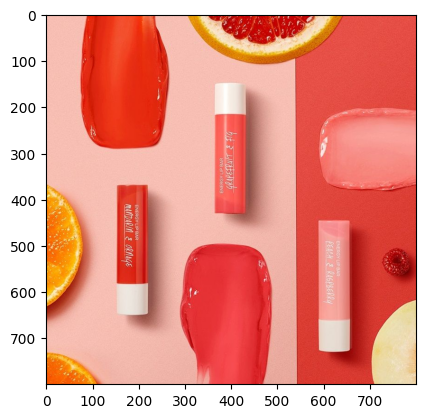

In [ ]:
#convert the image from BGR to RGB
img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[0.4015234375, 0.1460953125, 0.1157859375, 0.0392875, 0.2973078125]
[[244.14148908 190.7673186  176.2549771 ]
 [208.35089198  38.91417353  23.30653835]
 [233.26889431 140.12404804 127.82183343]
 [237.99657902 139.48363101  15.92561359]
 [224.58097407  70.8175967   62.99307469]]


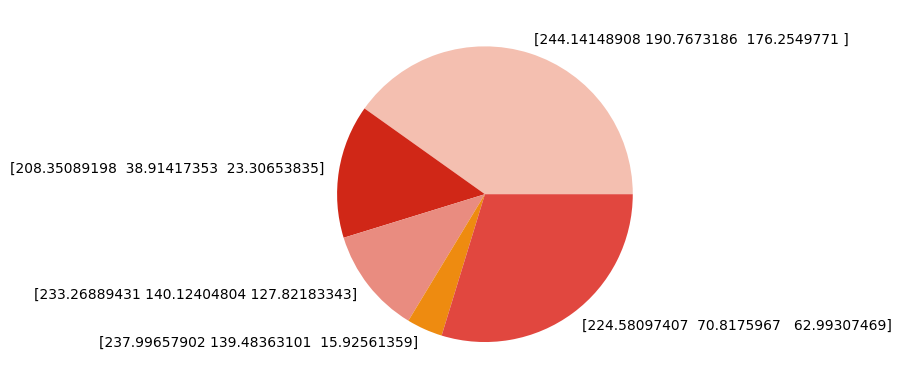

In [ ]:
def k_means_algorithm(img, num_of_clusters):
  #flattened the image where (row*column for # of pixels, value for each RGB)
  img=img.reshape((img.shape[1]*img.shape[0],3))
  kmeans=KMeans(n_clusters= num_of_clusters)
  #data returns labels(what cluster the pixel is conatined in), cluster centers(arrays of size 3 with rgb value of the cluster), and inertia(distance of all pixels to cluster)
  data=kmeans.fit(img)
  percentages = []
  labels = data.labels_
  centers = data.cluster_centers_
  hashmap = {}
  for i in range(len(labels)):
    if labels[i] in hashmap:
      hashmap[labels[i]] += 1
    else:
      hashmap[labels[i]] = 1
  for i in range(len(centers)):
    if i in hashmap:
      percentages.append(hashmap[i]/len(labels))
  print(percentages)
  print(centers)
  labels = [str(center) for center in centers]
  plt.pie(percentages, colors=(centers/255),labels=labels) # Use the string labels here
  plt.show()
#test case
k_means_algorithm(img, 5)

In [ ]:
def color_blindness_type(name):
  if name == "red-blind":
    transformation_matrix = np.array([[0.567,0.433,0.000],[0.558,0.442,0.000],[0.000,0.242,0.758]])
  elif name == "red-weak":
    transformation_matrix = np.array([[0.817,0.183,0.000], [0.333,0.667,0.000],[0.000,0.125,0.875]])
  elif name == "green-blind":
    transformation_matrix = np.array([[0.625,0.375,0.000], [0.700,0.300,0.000], [0.000,0.300,0.700]])
  elif name == "green-weak":
    transformation_matrix = np.array([[0.800,0.200,0.000],[0.258,0.742,0.000],[0.000,0.142,0.858]])
  elif name == "blue-blind":
    transformation_matrix = np.array([[0.950,0.050,0.000],[0.000,0.433,0.567],[0.000,0.475,0.525]])
  elif name == "blue-weak":
    transformation_matrix = np.array([[0.967,0.033,0.00],[0.00,0.733,0.267],[0.00,0.183,0.817]])
  elif name == "monochromacy":
    transformation_matrix = np.array([[0.299,0.587,0.114],[0.299,0.587,0.114],[0.299,0.587,0.114]])
  elif name == "blue-cone-monochromacy":
    transformation_matrix = np.array([[0.618,0.320,0.062],[0.163,0.775,0.062],[0.163,0.320,0.516]])
  return transformation_matrix
#matrices from https://gist.github.com/Lokno/df7c3bfdc9ad32558bb7

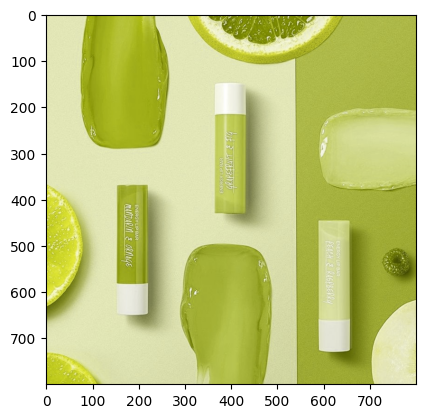

In [ ]:
def color_blindness_simulator(image, transformation_matrix):
  image = cv2.transform(image,transformation_matrix)
  plt.imshow(image)
#test case
color_blindness_simulator(img, color_blindness_type("green-blind"))

In [ ]:
def replace_one_color(image, old_rgb_values, new_rgb_values):
  img[np.all(img == old_rgb_values, axis = -1)] = new_rgb_values
#test case
replace_color(img, (229,78,69), (0,0,0))

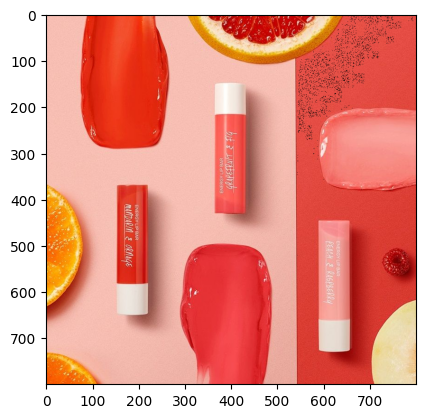

In [ ]:
plt.imshow(img)

In [ ]:
def replace_range_of_color(image, old_rgb_values, new_rgb_values,margin=10):
    r, g, b = old_rgb_values
    mask = (
        (image[:, :, 0] >= r - margin) & (image[:, :, 0] <= r + margin) &
        (image[:, :, 1] >= g - margin) & (image[:, :, 1] <= g + margin) &
        (image[:, :, 2] >= b - margin) & (image[:, :, 2] <= b + margin)
    )
    image[mask] = new_rgb_values
replace_range_of_color(img, (229,78,69), (0, 0, 0), 15)

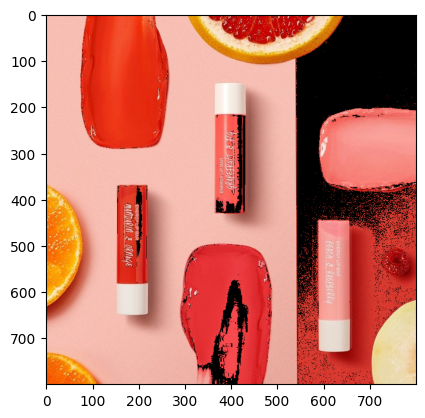

In [ ]:
plt.imshow(img)